In [1]:
import numpy as np 
import matplotlib.pyplot as plt

This tutorial assumes that the reader has some basic knowledge of the python programming language. If not, there are many great [beginners guides](https://www.python.org/about/gettingstarted/) online.

This is the typical header of many python scripts. Here we import two libraries. The first is the [`numpy` library](https://numpy.org/doc/stable/index.html), which is used to handle and manipulate numerical arrays (i.e. vectors, matrices and tensors). The second is the `pyplot` interface of the [`matplotlib` library](https://matplotlib.org/), which we can use for visualization. Note that both python and these libraries are free and open source software!

# Visualizing simple datasets

Let's begin by importing some data. It's always a good idea to look into the file you are loading with some text editor before importing. Once you've done this, run: 

In [2]:
time, conc, cover = np.loadtxt('data_1.csv',skiprows=1,delimiter=',',unpack=True)
print(time)
print(conc)
print(cover)

[ 0.          1.42857143  2.85714286  4.28571429  5.71428571  7.14285714
  8.57142857 10.        ]
[0.02046653 0.25048723 0.29824854 0.47488255 0.54715935 0.70779172
 0.89513118 0.96649878]
[100.22564138  70.05763104  49.03740964  34.56424794  24.01010463
  16.94941073  12.09206565   8.00349036]


We are using `skiprows=1` to skip the first row, which contains the title of each collumn. The `delimiter=','` keyword tells numpy to separate the collumns by commas (otherwise whitespaces are used by defualt). The `unpack=True` option gives us a single array for each collumn. We've named these `time`, `conc`, and `cover`, according to the top row in the data file. It's generally a good idea to use meaningful variable names (rather than `x` and `y`) if possible. At the same time, using very long names like `concentration_of_methylene_chloride_in_acetonitrile` should also be avoided, since they make the code harder to read. If we had used `unpack=False` (which is the default), we would have obtained one big array containing the data table as rows an collumns. This can also be useful in many cases, but here unpacking makes the data easier to hander

Once we have the data as numpy arrays, we can make plots. Two of the most common plots in science are line- and scatterplots:

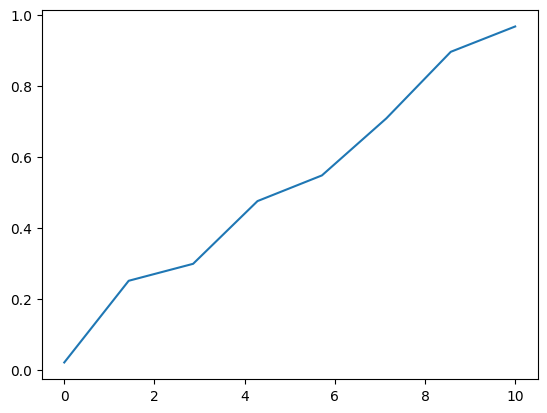

In [3]:
plt.plot(time,conc)
plt.show()

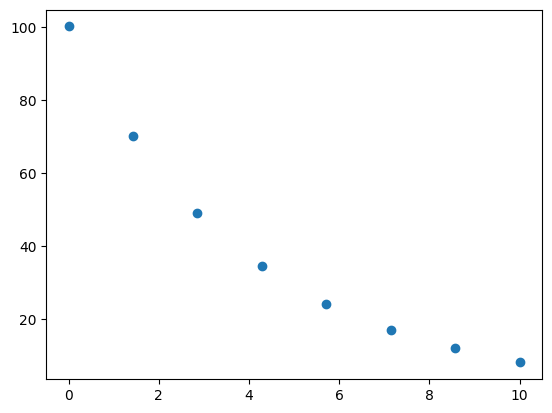

In [4]:
plt.scatter(time,cover)
plt.show()

A line plot implies that the underlying data is a continuous function, even if we only measured some discrete datapoints. In contrast, scatterplot emphasises the individual measurements and is therefore arguably more transparent. To combine the emphasis on measurements of the latter, with the visual clarity of the former, we can also combine both:

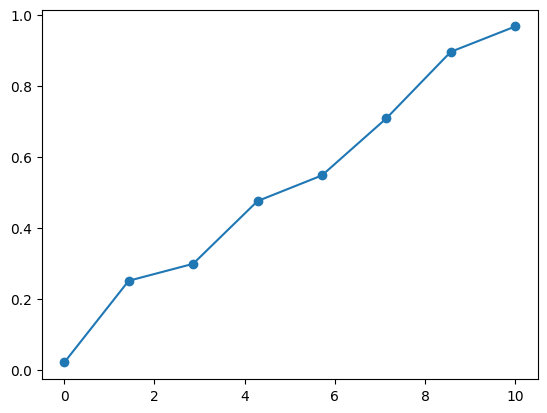

In [5]:
plt.plot(time,conc)
plt.scatter(time,conc)
plt.show()

This also shows some basic functionality of matplotlib: If we use multiple plot commands, everything will be plotted into the same frame, until we use the `plt.show()` command. 

Once we decide on our basic plotting style, we can customize the plot. For example, we should always add axis labels, but there are also many other options like adjusting symbols, linestyles, fontsizes. Here's a nicely styled plot:

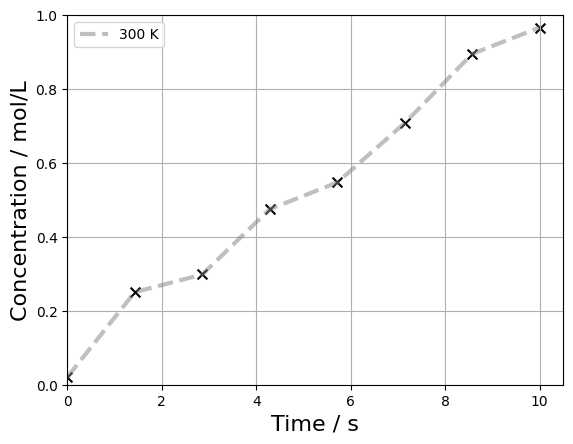

In [6]:
# This command defines a thicker, dashed line in gray, which is somewhat transparent (alpha=0.5)
plt.plot(time,conc,linestyle='--',linewidth=3,color='gray',alpha=0.5,label='300 K')
# This command defines large black crosses as symbols
plt.scatter(time,conc,marker='x',color='black',s=50)

# Now for the axis labels
plt.xlabel('Time / s',fontsize=16)
plt.ylabel('Concentration / mol/L',fontsize=16)

# We can also adjust the range of the plot. 
# For example, it's generally good practice to start a plot at 0, if the numbers cannot be negative anyways
plt.xlim([0,10.5])
plt.ylim([0,1])

# Finally, let's add a grid and a legend to the plot.
plt.grid()
plt.legend()

# Now we can save the figure as a .png 
plt.savefig('concentration_time.png')

plt.show()

Note that not all of these features have to be used in every plot. For example, legends can often be avoided by using meaningful colour schemes. Grids are helpful for quantitatively grasping data but also clutter the plot. It depends on the situation and personal taste, whether they should be used.

A big advantage of plotting with a programming language like python is that you can reuse code and options from previous plots to make everything consistent. For example, the plots in a scientific publication should all have the same style, fonts, sizes, etc. Python makes it very easy to do this, and it makes it very easy to change things by simply adapting the code that generated a figure. It's also possible to define user defaults, so that you do not have to adjust the fontsize for every new plot.

Full details of what can be done with `matplotlib` are provided in the [user guide](https://matplotlib.org/stable/users/explain/quick_start.html).

# Visualizing multiple datasets together

When we imported the data, we obtained three rows: time, concentration and coverage. Say we want to analyze how the latter two behave as a function of time. We could of course easily plot them together as such:

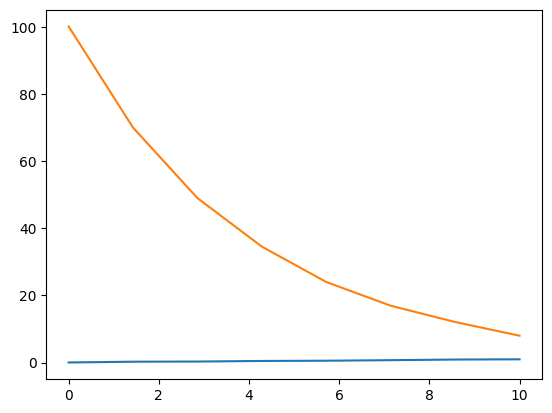

In [7]:
plt.plot(time,conc)
plt.plot(time,cover)
plt.show()

This is not a very nice plot, the coverage changes over a much bigger range than the concentration. We therefore can't really see what is happening with the latter. What can we do to improve this? One option is to use multiple y-axes:

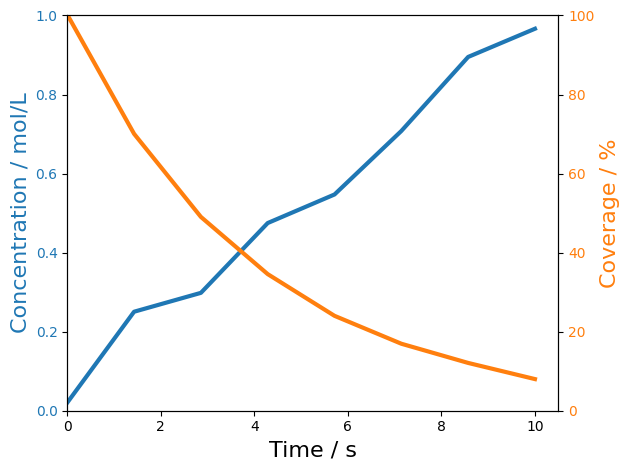

In [8]:
fig, ax1 = plt.subplots()

# We create a first plot
color = 'tab:blue'
ax1.set_xlabel('Time / s',fontsize=16)
ax1.set_ylabel('Concentration / mol/L', color=color,fontsize=16)
ax1.plot(time, conc, color=color, linewidth=3)
ax1.tick_params(axis='y', labelcolor=color)

# We create a second y-axis for the second plot
ax2 = ax1.twinx()  
color = 'tab:orange'
ax2.set_ylabel('Coverage / %', color=color,fontsize=16)  # we already handled the x-label with ax1
ax2.plot(time, cover, color=color, linewidth=3)
ax2.tick_params(axis='y', labelcolor=color)

# Set limits
ax1.set_xlim([0,10.5])
ax1.set_ylim([0,1])
ax2.set_ylim([0,100])

fig.tight_layout()  # otherwise the right y-label is slightly clipped

# Now we can save the figure as a .png 
plt.savefig('concentration_time_dual.png')
plt.show()

A nice feature here is that the colors of the axes tell us which axis belongs to which dataset. This way we can avoid using a legend.

As you probably noticed, the coding style here is a bit different than before. Instead of using `plt.` commands for everything, we now have multiple `ax.` objects to deal with. This is because there are two different approaches to making plots in matplotlib, the implicit and explicit coding style (see [here](https://matplotlib.org/stable/users/explain/quick_start.html#the-explicit-and-the-implicit-interfaces) for details). Getting into the details would be beyond the scope of this tutorial, enough to say that we generally move to the explicit interface for more complex plots, whereas the implicit is fine for simple plots.

Another option to plot this is to make subplots with a shared x-axis:

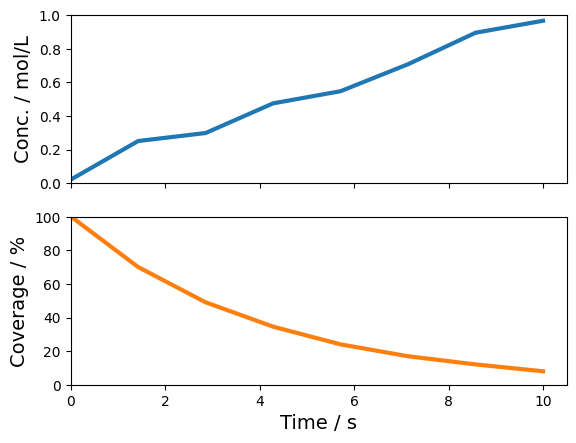

In [9]:
# Create two subplots 
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

# Plot top plot
ax1.plot(time, conc, linewidth=3, color = 'tab:blue')
ax1.set_ylabel('Conc. / mol/L',fontsize=14)

# Plot lower plot
ax2.plot(time, cover, linewidth=3, color = 'tab:orange')
ax2.set_ylabel('Coverage / %', fontsize=14)  # we already handled the x-label with ax1
ax2.set_xlabel('Time / s',fontsize=14)

# Set limits
ax2.set_xlim([0,10.5])
ax1.set_ylim([0,1])
ax2.set_ylim([0,100])

fig.tight_layout()

# Now we can save the figure as a .png 
plt.savefig('concentration_time_subplots.png')
plt.show()

# Discrete Data

While line and scatter plots are perhaps the most common type of data visualization, there are also cases where they are not suitable. This is particularly the case for discrete data. As an example, consider `data_2.csv`, which contains measured sizes of nanoparticles:

In [10]:
sizes = np.loadtxt('data_2.csv',skiprows=1)
print(sizes)

[59.13753362 64.68240308 60.65157738 62.59659908 48.11450843 49.53766556
 32.12203002 61.01387418 44.32569909 35.02713667 39.27011178 45.89994209
 43.46596527 77.21822526 47.95416043 58.03440006 45.3837785  43.79125469
 50.47340192 60.82086349 81.82621808 42.46351799 34.4080362  49.04631058
 42.90503222 43.63419893 51.58016707 60.83059963 63.03896949 69.47975719
 72.82130784 54.66522637 49.67505635 44.12605979 21.37921749 49.95343371
 67.08701256 52.99256977 53.32715439 48.31317443 49.76829161 60.41255742
 47.62813061 55.03093338 47.25546241 57.18858611 47.68237116 66.12213365
 47.33827338 49.14995335 46.95501421 38.26721378 56.42860878 54.17755213
 40.18179505 45.59261248 12.1414268  57.45149887 37.03199001 31.37168064
 48.92549221 51.85103397 42.05050376 64.45888701 50.80469858 41.84527832
 38.32503512 53.29782597 27.34911257 45.95994902 66.61455138 59.02940387
 36.18041277 51.90674785 45.84465035 50.1834631  19.98768053 51.20623864
 53.42768697 52.67548686 36.91031186 67.52194368 41

To visualize this dataset, we can use a histogram:

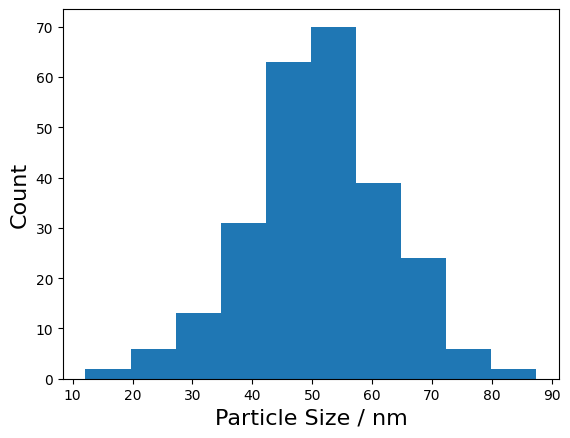

In [11]:
# This command makes a histogram
plt.hist(sizes)

# Now for the axis labels
plt.xlabel('Particle Size / nm',fontsize=16)
plt.ylabel('Count',fontsize=16)

plt.show()

This gives us a good general impression about how the particle size is distributed. Histograms divide the space of possible particle sizes into evenly spaced *bins* and then count how many datapoints fall into each bin. This is why the *count* is commonly used as the y-axis in a histogram. Alternatively, we can also plot the *density*, i.e. which fraction of the datapoints fall into each bin. This is useful if we want to interpret the histogram as a probability distribution.

One obvious quesion about histograms is how many bins to use (or equivalently how small or big the bins should be). `matplotlib` has some reasonable defaults here, which depend on the range the data covers and the number of datapoints used. In this case 10 bins are used. But it's always a good idea to play around with this option:

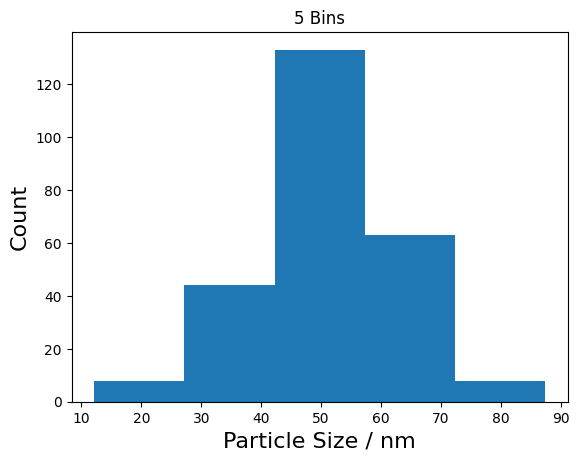

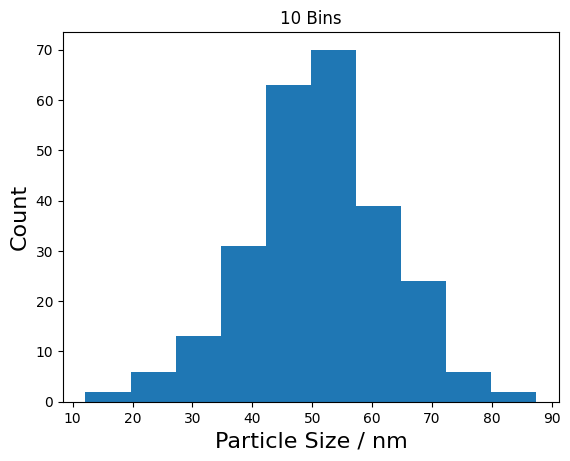

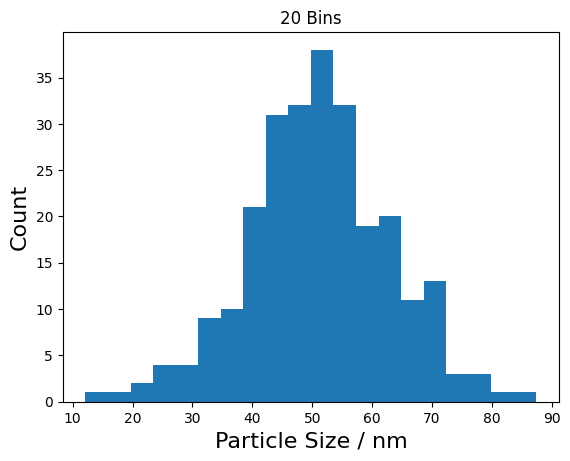

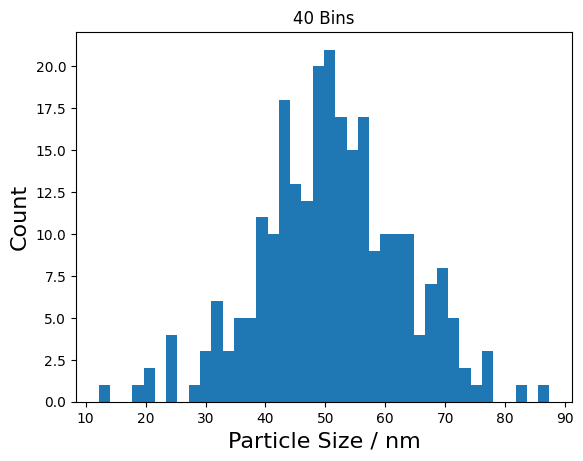

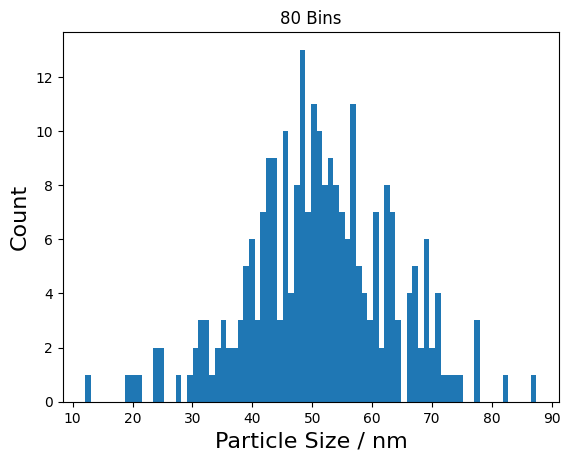

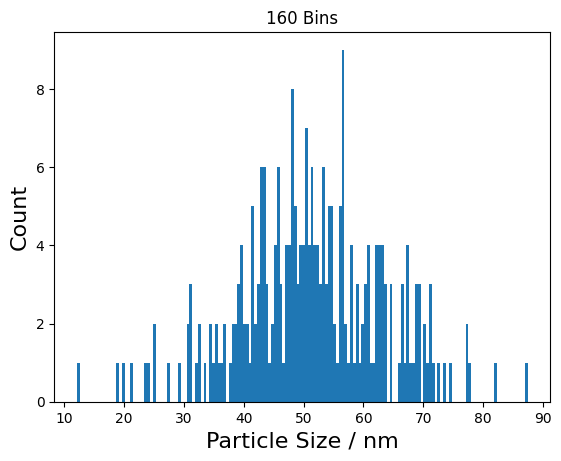

In [12]:
# Here we use a loop to make plots with different numbers of bins
for n_bins in [5,10,20,40,80,160]:
    plt.hist(sizes,bins=n_bins)

    # Now for the axis labels
    plt.title(f"{n_bins} Bins")
    plt.xlabel('Particle Size / nm',fontsize=16)
    plt.ylabel('Count',fontsize=16)

    plt.show()

This example shows a couple of things: First, we can use loops in Python to easily make different version of a plot. This is very useful for exploring different visualization options. Second, the number of bins allows us to smooth the distribution. Using too many bins leads to holes in the distribution, using very few bins hides some information (like what the mean size is). The default of 10 is a good choice for this dataset, but I personally would prefer 20 bins in this case. This way the uncertainty of the experiment is more visible, which is also an important aspect of data visualization.